In [196]:
import numpy as np
import matplotlib.pyplot as plt

In [197]:
import scipy.io as so

In [198]:
def plot_a_trial(filename, ax, cells_to_plot):
    filepath = "C:/Users/bhava/Downloads/grid_cell_data/hafting2005_data"
    dat_mat = so.loadmat(filepath+"/"+filename)
    pos_x = dat_mat['pos_x']
    pos_y = dat_mat['pos_y']
    
    pos_timeStamps = dat_mat['pos_timeStamps']
    
    c1_timeStamps = dat_mat['rat11015_t5c1_timeStamps']
    c2_timeStamps = dat_mat['rat11015_t5c2_timeStamps']
    c3_timeStamps = dat_mat['rat11015_t5c3_timeStamps']

    CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

    
    l_ind_postime_c1 = []
    for sp_time in c1_timeStamps.squeeze():
        l_ind_postime_c1.append(np.argmin(abs(pos_timeStamps.squeeze() - sp_time)))
    grid_cell1_x = pos_x[l_ind_postime_c1]
    grid_cell1_y = pos_y[l_ind_postime_c1]

    l_ind_postime_c2 = []
    for sp_time in c2_timeStamps.squeeze():
        l_ind_postime_c2.append(np.argmin(abs(pos_timeStamps.squeeze() - sp_time)))
    grid_cell2_x = pos_x[l_ind_postime_c2]
    grid_cell2_y = pos_y[l_ind_postime_c2]

    l_ind_postime_c3 = []
    for sp_time in c3_timeStamps.squeeze():
        l_ind_postime_c3.append(np.argmin(abs(pos_timeStamps.squeeze() - sp_time)))
    grid_cell3_x = pos_x[l_ind_postime_c3]
    grid_cell3_y = pos_y[l_ind_postime_c3]

    # plt.figure(figsize=(6,6))
    ax.plot(pos_x, pos_y, c='k', alpha=0.2 )

    size = 10
    if cells_to_plot == 1:
        ax.scatter(grid_cell1_x, grid_cell1_y, marker = "*", c=CB_color_cycle[0], alpha=0.8, s=size)
    elif cells_to_plot == 2:
        ax.scatter(grid_cell1_x, grid_cell1_y, marker = "*", c=CB_color_cycle[0], alpha=0.8, s=size)
        ax.scatter(grid_cell2_x, grid_cell2_y, marker = "+", c=CB_color_cycle[1], alpha=0.8, s=size)
    elif cells_to_plot == 3:
        ax.scatter(grid_cell1_x, grid_cell1_y, marker = "*", c=CB_color_cycle[0], alpha=0.8, s=size)
        ax.scatter(grid_cell2_x, grid_cell2_y, marker = "+", c=CB_color_cycle[1], alpha=0.8, s=size)
        ax.scatter(grid_cell3_x, grid_cell3_y, marker = "^", c=CB_color_cycle[2], alpha=0.8, s=size)
    return ax

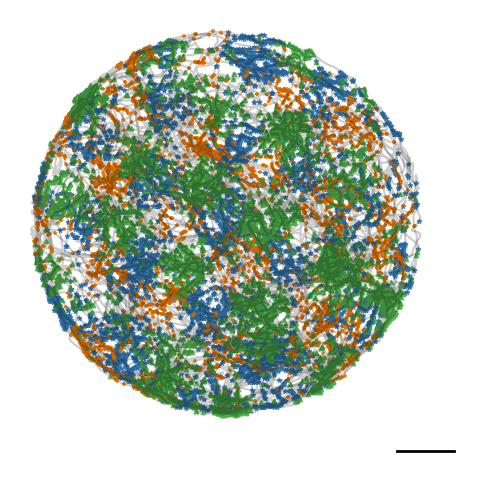

In [203]:
# pos_timeStamps = dat_mat['pos_timeStamps']
fig, ax = plt.subplots(figsize=(6,6))
filename = "Hafting_Fig2C_Trial1.mat"
cells_to_plot = 3
ax = plot_a_trial(filename, ax, cells_to_plot)

filename = "Hafting_Fig2c_Trial2.mat"
cells_to_plot = 3
ax = plot_a_trial(filename, ax, cells_to_plot)

## plotting scalebars
plt.plot([50+25,75+25],[-80-25,-80-25],c='k',lw=2)
# plt.plot([75+25,75+25],[-80-25,-55-25],c='k',lw=2)
ax = plt.gca()
ax.set_axis_off()
plt.savefig("grid_cell123_spikes.svg", format="svg")
